# Průhyb prutu

Vypracoval: Filip Horák, 2017/2018

U prutu dle obrázku sestrojte graf průhybu prutu a nalezněte nejvíce prohnutý průřez.

## Řešení

Ze začátku je nutné naimportovat potřebné knihovny.

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image
sp.init_printing()

Vyvoláme obrázek úlohy.

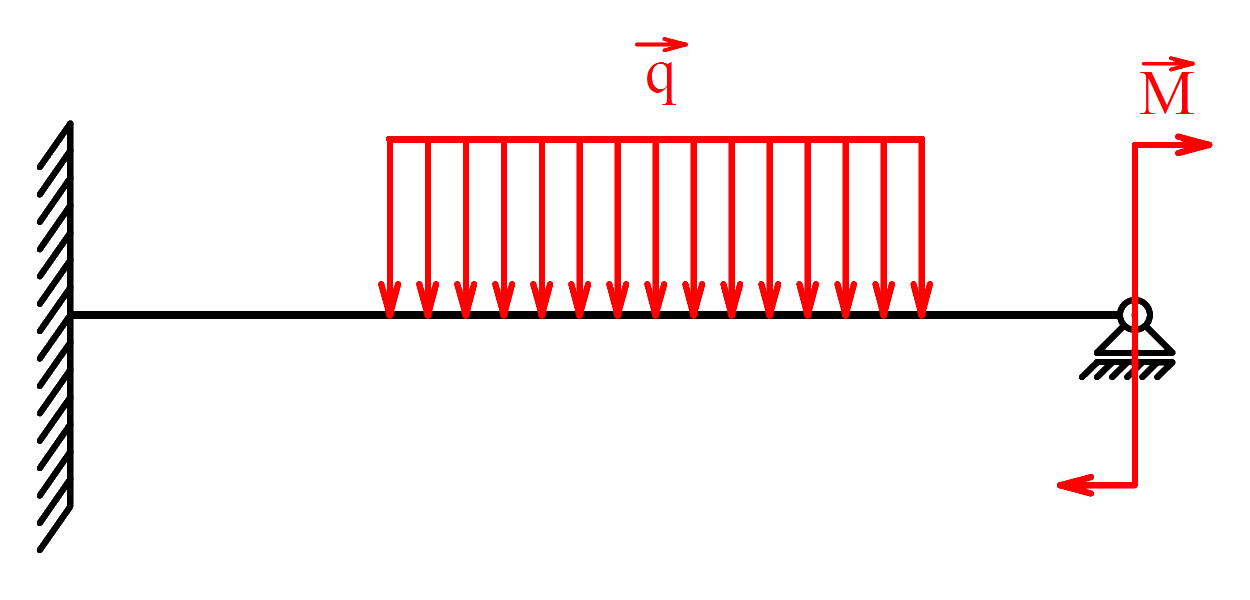

In [2]:
Image(filename='04-o-pruhyb-1.png', width=500)

Prut částečně uvolníme a stanovíme deformační podmínku:
$$w_B=0$$

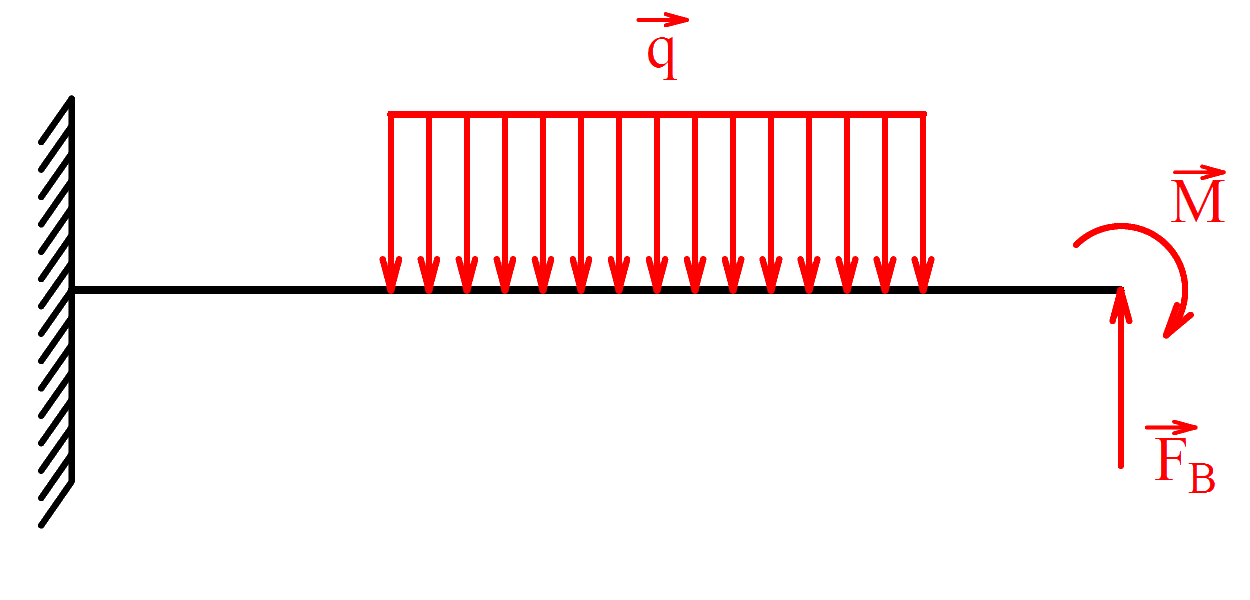

In [3]:
Image(filename='04-o-pruhyb-2.png', width=500)

Zavedeme potřebné proměnné jako symboly.

In [4]:
FB,M,L,q=sp.symbols('FB M L q')
E,J=sp.symbols('E J')
x1,x2,x3=sp.symbols('x1 x2 x3')
w1=sp.Function('w1')
w2=sp.Function('w2')
w3=sp.Function('w3')
C1,C2,C3,C4,C5,C6=sp.symbols('C1 C2 C3 C4 C5 C6')

Vyjádříme vnitřní účinky ohybového momentu jednotlivých úseků:
$$x_{1} \in \langle 0,8l ;l\rangle,\quad x_{2} \in \langle 0,3l ;0,8l\rangle,\quad x_{3} \in \langle 0 ;0,3l\rangle$$

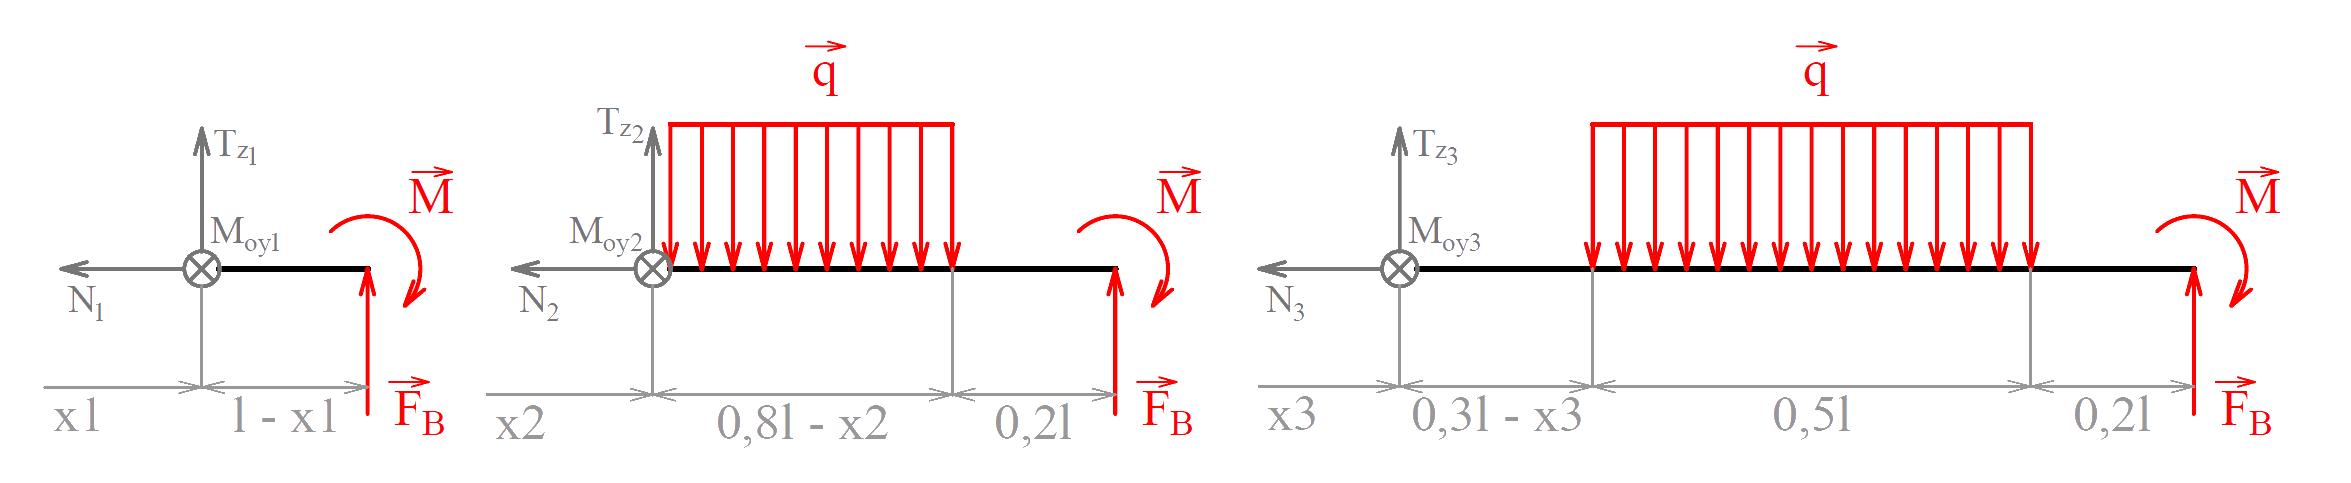

In [5]:
Image(filename='04-o-pruhyb-3.png', width=950)

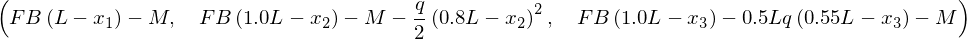

In [6]:
M1=FB*(L-x1)-M
M2=FB*(0.2*L+(0.8*L-x2))-M-q*(0.8*L-x2)**2/2
M3=FB*(0.2*L+0.5*L+(0.3*L-x3))-M-q*0.5*L*(0.5*L/2+(0.3*L-x3))
M1,M2,M3

Napíšeme diferenciální rovnice pro jednotlivé úseky.

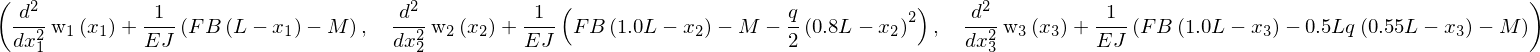

In [7]:
deqn1=w1(x1).diff(x1,x1)+M1/E/J
deqn2=w2(x2).diff(x2,x2)+M2/E/J
deqn3=w3(x3).diff(x3,x3)+M3/E/J
deqn1,deqn2,deqn3

Řešení první rovnice.

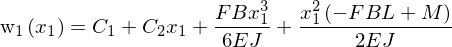

In [8]:
dsol1=sp.dsolve(deqn1,w1(x1))
dsol1

Řešení druhé rovnice.

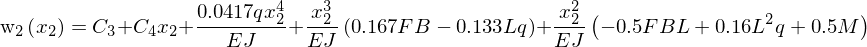

In [9]:
dsol2=sp.dsolve(deqn2,w2(x2))
dsol2_modified=dsol2.subs([(C1,C3),(C2,C4)])
sp.N(dsol2_modified,3)

Řešení třetí rovnice.

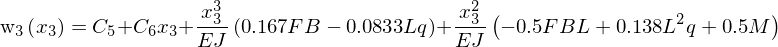

In [10]:
dsol3=sp.dsolve(deqn3,w3(x3))
dsol3_modified=dsol3.subs([(C1,C5),(C2,C6)])
sp.N(dsol3_modified,3)

Abychom mohli s rovnicemi dále pracovat musíme nejprve vyřešit průhyby $w_1, w_2,w_3$ pomocí příkazu *solve*.

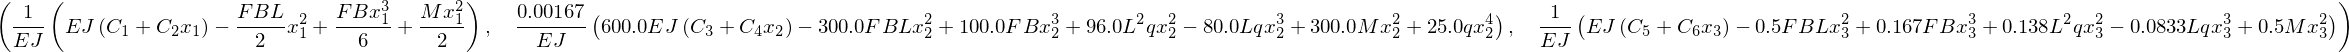

In [11]:
w1_=sp.solve(dsol1,w1(x1))
w2_=sp.solve(dsol2_modified,w2(x2))
w3_=sp.solve(dsol3_modified,w3(x3))
w1,w2,w3=w1_[0],w2_[0],w3_[0]
w1,sp.N(w2,3),sp.N(w3,3)

Vyjádříme derivace $w'_1,w'_2,w'_3$.

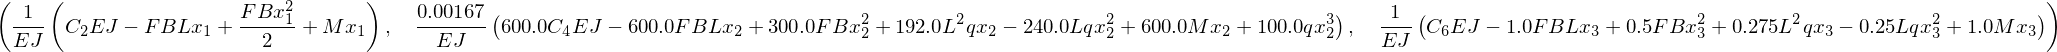

In [12]:
dw1=w1.diff(x1)
dw2=w2.diff(x2)
dw3=w3.diff(x3)
dw1,sp.N(dw2,3),dw3

Vyjádříme energii napjatosti W.

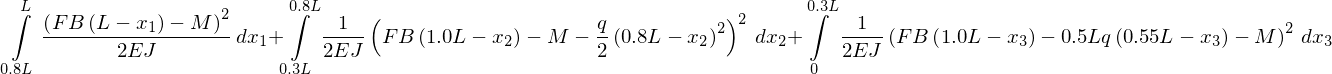

In [13]:
dW1=M1**2/2/E/J
dW2=M2**2/2/E/J
dW3=M3**2/2/E/J
W=sp.Integral(dW1,[x1,0.8*L,L])+sp.Integral(dW2,[x2,0.3*L,0.8*L])+sp.Integral(dW3,[x3,0,0.3*L])
W

Sestavíme deformační podmínku a následně energii napjatosti zderivujeme podle síly $F_B$.
$$\frac{\partial W}{\partial F_B} = 0$$

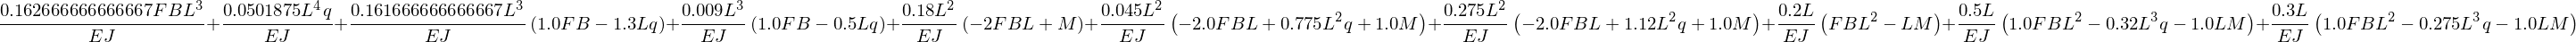

In [14]:
dp=W.diff(FB)
dp_=dp.doit()
dp_

Sestavíme okrajové podmínky hladkosti a spojitosti: 
$$\begin{align}
w_1(0,8L) & = w_2(0,8L) \\
w'_1(0,8L) & = w'_2(0,8L) \\
w_2(0,3L) & = w_3(0,3L) \\
w'_2(0,3L) & = w'_3(0,3L) \\
w_3(0) & = 0 \\
w'_3(0) & = 0
\end{align}$$

In [15]:
bc1=w1.subs(x1,0.8*L)-w2.subs(x2,0.8*L)
bc2=dw1.subs(x1,0.8*L)-dw2.subs(x2,0.8*L)
bc3=w2.subs(x2,0.3*L)-w3.subs(x3,0.3*L)
bc4=dw2.subs(x2,0.3*L)-dw3.subs(x3,0.3*L)
bc5=w3.subs(x3,0)
bc6=dw3.subs(x3,0)

Vyřešíme soustavu rovnic sestavenou z okrajových podmínek, čímž získáme konstanty $C_1,C_2,C_3,C_4,C_5$,$C_6$ a sílu $F_B$.

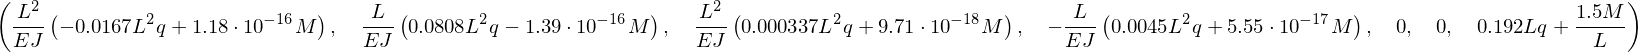

In [16]:
sol_bc=sp.linsolve([sp.expand(bc1),sp.expand(bc2),sp.expand(bc3),\
                    sp.expand(bc4),sp.expand(bc5),sp.expand(bc6),\
                    sp.expand(dp_)],[C1,C2,C3,C4,C5,C6,FB])      
C1_,C2_,C3_,C4_,C5_,C6_,FB_=next(iter(sol_bc))
sp.N(C1_,3),sp.N(C2_,3),sp.N(C3_,3),\
sp.N(C4_,3),sp.N(C5_,3),sp.N(C6_,3),sp.N(FB_,3)

Konstanty zpětně dosadíme rovnic průhybů a natočení.

In [17]:
w1_solved=w1.subs({C1:C1_,C2:C2_,FB:FB_})
dw1_solved=dw1.subs({C1:C1_,C2:C2_,FB:FB_})
w2_solved=w2.subs({C3:C3_,C4:C4_,FB:FB_})
dw2_solved=dw2.subs({C3:C3_,C4:C4_,FB:FB_})
w3_solved=w3.subs({C5:C5_,C6:C6_,FB:FB_})
dw3_solved=dw3.subs({C5:C5_,C6:C6_,FB:FB_})

Zavedeme číselné hodnoty veličin.
$$\begin{align}
L & = 1000\, \mathrm{mm} \\
d & = 30\, \mathrm{mm} \\
M & = 500\, \mathrm{Nmm} \\
E & = 2.1\cdot 10^5\, \mathrm{MPa} \\
J & = \frac{\pi d^4}{64} \approx 39760\, \mathrm{mm^4}
\end{align}$$

In [18]:
L_in=1000
d=30
M_in=500
E_in=2.1e5
J_in=sp.pi*d**4/64

Vytvoříme souřadnice průhybové čáry pro různá $q$.

In [19]:
xI=np.linspace(0.8*L_in,L_in,20)
wI10=[-w1_solved.evalf(subs={x1:ii,q:10,L:L_in,E:E_in,J:J_in,M:M_in}) for ii in xI]
wI20=[-w1_solved.evalf(subs={x1:ii,q:20,L:L_in,E:E_in,J:J_in,M:M_in}) for ii in xI]
wI30=[-w1_solved.evalf(subs={x1:ii,q:30,L:L_in,E:E_in,J:J_in,M:M_in}) for ii in xI]

xII=np.linspace(0.3*L_in,0.8*L_in,20)
wII10=[-w2_solved.evalf(subs={x2:ii,q:10,L:L_in,E:E_in,J:J_in,M:M_in}) for ii in xII]
wII20=[-w2_solved.evalf(subs={x2:ii,q:20,L:L_in,E:E_in,J:J_in,M:M_in}) for ii in xII]
wII30=[-w2_solved.evalf(subs={x2:ii,q:30,L:L_in,E:E_in,J:J_in,M:M_in}) for ii in xII]

xIII=np.linspace(0,0.3*L_in,20)
wIII10=[-w3_solved.evalf(subs={x3:ii,q:10,L:L_in,E:E_in,J:J_in,M:M_in}) for ii in xIII]
wIII20=[-w3_solved.evalf(subs={x3:ii,q:20,L:L_in,E:E_in,J:J_in,M:M_in}) for ii in xIII]
wIII30=[-w3_solved.evalf(subs={x3:ii,q:30,L:L_in,E:E_in,J:J_in,M:M_in}) for ii in xIII]

Vykreslíme graf průhybu pro různá $q$.

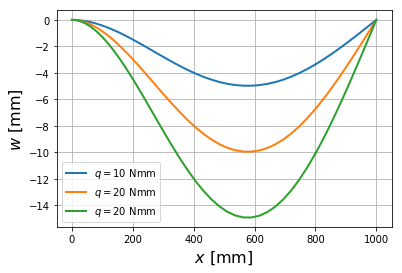

In [20]:
x=[]

for ii in xIII:
    x.append(ii)
    
for ii in xII:
    x.append(ii)
    
for ii in xI:
    x.append(ii)

w10=wIII10+wII10+wI10
w20=wIII20+wII20+wI20
w30=wIII30+wII30+wI30
fig,ax=plt.subplots()
plt.ylabel(r'$w\ \mathrm{[mm]}$').set_fontsize(16)
plt.xlabel(r'$x\ \mathrm{[mm]}$').set_fontsize(16)
ax.plot(x,w10,label=r'$q=10\ \mathrm{Nmm}$',lw=2)
ax.plot(x,w20,label=r'$q=20\ \mathrm{Nmm}$',lw=2)
ax.plot(x,w30,label=r'$q=20\ \mathrm{Nmm}$',lw=2)
ax.legend(loc='lower left')
ax.grid(True)

Spočteme bod největšího průhybu při různých hodnotách $q$ pomocí vztahu:
\begin{equation}
\frac{\mathrm{d}w_2(x_2)}{\mathrm{d}x_2}=0\Rightarrow x_{w_{max}}
\end{equation}

In [21]:
xI10_sol=sp.solve(dw2_solved.subs({q:10,L:L_in,E:E_in,J:J_in,M:M_in}),x2)
x10=abs(xI10_sol[1])
wmax10=w2_solved.subs({q:10,L:L_in,E:E_in,J:J_in,M:M_in,x2:xI10_sol[1]})
xI20_sol=sp.solve(dw2_solved.subs({q:20,L:L_in,E:E_in,J:J_in,M:M_in}),x2)
x20=abs(xI20_sol[1])
wmax20=w2_solved.subs({q:20,L:L_in,E:E_in,J:J_in,M:M_in,x2:xI20_sol[1]})
xI30_sol=sp.solve(dw2_solved.subs({q:30,L:L_in,E:E_in,J:J_in,M:M_in}),x2)
x30=abs(xI30_sol[1])
wmax30=w2_solved.subs({q:30,L:L_in,E:E_in,J:J_in,M:M_in,x2:xI30_sol[1]})
print ('x10={}; wmax={} mm\nx20={}; wmax={} mm\nx30={};\
 wmax={} mm'.format(sp.N(x10,6),-abs(sp.N(wmax10,4)),\
                    sp.N(x20,6),-abs(sp.N(wmax20,4)),\
                    sp.N(x30,6),-abs(sp.N(wmax30,5))))

x10=577.567; wmax=-4.979 mm
x20=577.584; wmax=-9.959 mm
x30=577.590; wmax=-14.940 mm
